In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#sys.path.append('/home/jp/projects/python_tools')
import sys
sys.path.append('/Users/trwood/JP_fraction_original_jan26_test_lessbins/modules/')
import jp_mpl as jplot

from itertools import cycle
import re
import pickle as pckl

In [2]:
import numpy as np
import re
import pickle as pckl
from scipy.interpolate import interp1d

In [3]:
#checks minus k 
true_axis_mu7 = np.array([[0., 9.],[9., 15.], [15., 25.],[25., 40.], [40.,70.], [70., 120.], [120., 1000.]])
true_axis_e5  = np.array( [ [0., 9.], [9., 15.], [15., 30.],[30., 70.], [70.,1000.]])
true_axisBE  = np.array( [ [0., 9.], [9., 15.], [15., 30.],[30., 70.], [70.,1000.]])

In [4]:
data_hondaa = pckl.load(open("/Users/trwood/oscfit_at_home/post_berlin_many_pseudo_vacuum/data_output/new_ste_table_submitted_units.pckl"))


In [9]:
scaling_factor = 5.7

In [5]:
sys.path.append('/Users/trwood/Downloads/downloaded_notebokos/tables_rc1/DPMJETIII_h3a_rc1/')
import Keep_E3Flat_DPM_h3a_rc1

In [6]:
flux_corr = Keep_E3Flat_DPM_h3a_rc1.MCEqFluxSpline()

In [7]:
#DPMJET h3a (used to genearte the data in this unfolding trial)

#Make spline table. Chose the same size at STEVEN WREN uses for fun

#ENergy steps (in GeV)
eedges = np.logspace(-0.5, 3., 301)
#eedges = np.logspace(-0.5, 3., 301)
ecenters = (eedges[1:] + eedges[:-1])/2.
ecenters_new = (eedges[1:] + eedges[:-1])/2.
esteps = eedges[1:]-eedges[:-1]

#cos zenith steps  (radians)
zedges = np.linspace(-1,1, 101)
zcenters = (zedges[1:] + zedges[:-1])/2.

#NUMU
sum_numu_from_p = np.zeros_like(ecenters)
sum_numu_from_k = np.zeros_like(ecenters)
sum_numubar_from_p = np.zeros_like(ecenters)
sum_numubar_from_k = np.zeros_like(ecenters)
    #NuMu totals
sum_numu_all = np.zeros_like(ecenters)
sum_numubar_all = np.zeros_like(ecenters)


#NUE
sum_nue  = np.zeros_like(ecenters)
sum_nuebar  = np.zeros_like(ecenters)

bin_width = 2.0/len(zcenters)

for eii, energyi  in enumerate(ecenters):
        for zii, czenith  in enumerate(zcenters):
#NUMU  pions and kaons
                
                sum_numu_from_k[eii] +=(flux_corr.EvaluateSpline('numu_from_k',energyi, czenith))*bin_width
                sum_numubar_from_k[eii] +=(flux_corr.EvaluateSpline('antinum_from_k',energyi, czenith))*bin_width

              
#NUMU totals
                sum_numu_all[eii] +=(flux_corr.EvaluateSpline('numu',energyi, czenith))*bin_width
                sum_numubar_all[eii] +=(flux_corr.EvaluateSpline('antinumu',energyi, czenith))*bin_width
                
#NUE
                sum_nue[eii]  +=(flux_corr.EvaluateSpline('nue',energyi, czenith))*bin_width
                sum_nuebar[eii] +=(flux_corr.EvaluateSpline('antinue',energyi, czenith))*bin_width


In [8]:
nue_tot =  (sum_nue + sum_nuebar ) * ecenters**3
                                   
                                   
numu_from_p= (sum_numu_all + sum_numubar_all - sum_numu_from_k - sum_numubar_from_k) 
numu_tot_k = (sum_numu_from_k + sum_numubar_from_k)

numu_tot_use_ySA = (numu_from_p + numu_tot_k) * ecenters**3

numu_tot_use_ySA_up50pions = (numu_from_p*1.5 + numu_tot_k) * ecenters**3
#numu_tot_use_ySA =  (sum_numu_all + sum_numubar_all)  * ecenters**3


#pions = numu_from_pi_and_mu*0.50
fmu_pUP50 = interp1d(ecenters,numu_tot_use_ySA_up50pions, kind='cubic' )


fmu_p = interp1d(ecenters,(numu_from_p)*ecenters**3 , kind='cubic' )

fmu_k = interp1d(ecenters,(numu_tot_k)*ecenters**3, kind='cubic' )
fmu = interp1d(ecenters, numu_tot_use_ySA, kind='cubic' )

In [9]:
print flux_corr.correction_factor(ecenters, 1.50)

[ 0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181  0.68265181
  0.68265181  0.68305842  0.68355817  0.68405017  0.68453497  0.68501312
  0.68548519  0.68595173  0.68641335  0.68687065  0.68732424  0.68777477
  0.68822293  0.6886694   0.68911494  0.68956031  0.69000636  0.69045305
  0.69089448  0.69132966  0.6917589   0.69218251  0.69260082  0.69301419
  0.69342299  0.69382762  0.69422851  0.69462613  0.69501935  0.69540421
  0.69578014  0.69614672  0.69650352  0.69685008  0

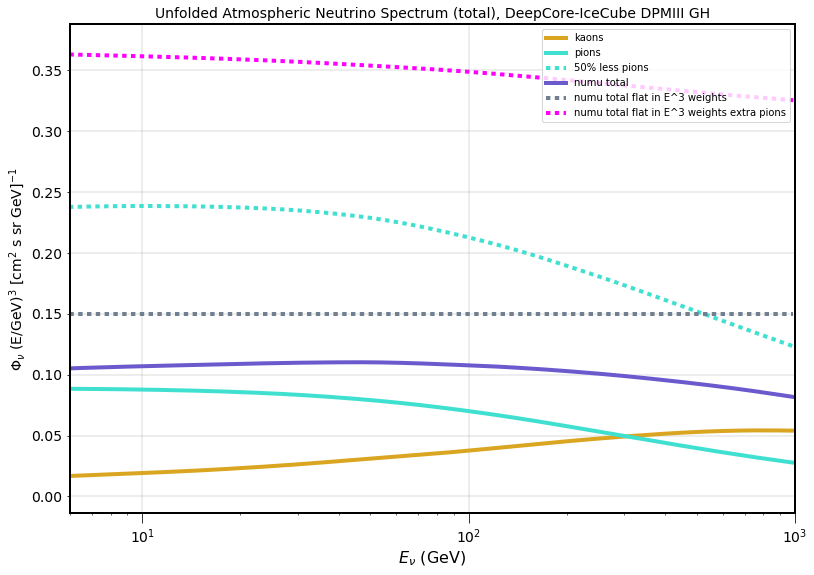

In [10]:
fig = plt.figure(figsize=(13,9))

#what happens in the code?  well say the pions FROM THE FLAT WEIGHTS go down 50%



#plt.plot(ecenters,numu_tot_use_yA, ls =':', color = 'm', linewidth = 4.0, label = r'TOTAL NUMU (old): DPMJET GH $\nu_{\mu}$: $\pi$ + k ')
plt.plot(ecenters,fmu_k(ecenters), color = 'goldenrod', linewidth = 4.0, label = r'kaons')
plt.plot(ecenters,fmu_p(ecenters), color = 'turquoise', linewidth = 4.0, label = r'pions')
plt.plot(ecenters,(fmu_p(ecenters) + fmu_pUP50(ecenters)), ls = ':',color = 'turquoise', linewidth = 4.0, label = r'50% less pions')

#plt.plot(ecenters,0.15*flux_corr.correction_factor(ecenters, 1.50)*((fmu(ecenters)+fmu_pUP50(ecenters))/numu_tot_use_ySA), color = 'k' , linewidth = 4.0, label = r'nu_pi_Scale = 0.5 * corr factor ')

#plt.plot(ecenters,fmu_p, color = 'slateblue', linewidth = 4.0, label = r'numu total')
plt.plot(ecenters,fmu(ecenters), color = 'slateblue', linewidth = 4.0, label = r'numu total')

plt.plot(ecenters,0.150*numu_tot_use_ySA/fmu(ecenters), color = 'slategrey', ls = ':', linewidth = 4.0, label = r'numu total flat in E^3 weights')
#plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/numu_tot_use_ySA, ls = ':', color = 'magenta', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')


plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters), ls = ':', color = 'magenta', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')

#plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters) , ls = ':', color = 'k', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')

#plt.plot(ecenters, 0.150*numu_tot_use_ySA/fmu(ecenters))

plt.xscale('log')
#plt.scale('loglog')
#plt.yscale('log')
plt.xlim([6, 1000])
#plt.ylim(0., 24.)

plt.title(r"Unfolded Atmospheric Neutrino Spectrum (total), DeepCore-IceCube DPMIII GH", fontsize=14)
plt.xlabel(r"$E_\nu$ (GeV)", fontsize=16)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=14)
plt.legend(loc=0)

In [ ]:
#Now times the correction factor,   :   flux_corr.correction_factor(ecenters, 1.50)

In [16]:
flux_corr.correction_factor(ecenters, 0.50)

array([ 1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86872446,
        1.86872446,  1.86872446,  1.86872446,  1.86872446,  1.86568422,
        1.86196606,  1.85832527,  1.85475675,  1.8512555 ,  1.84781654,
        1.8444349 ,  1.84110565,  1.83782381,  1.83458437,  1.83138224,
        1.82821226,  1.82506914,  1.82194741,  1.81884145,  1.8157454 ,
        1.81265946,  1.80962404,  1.80664527,  1.80372043,  1.80

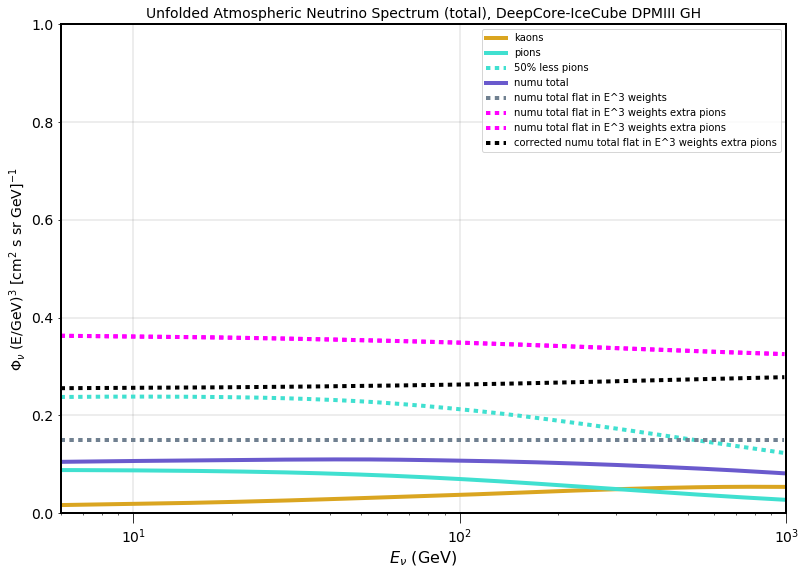

In [19]:
fig = plt.figure(figsize=(13,9))

#what happens in the code?  well say the pions FROM THE FLAT WEIGHTS go down 50%



#plt.plot(ecenters,numu_tot_use_yA, ls =':', color = 'm', linewidth = 4.0, label = r'TOTAL NUMU (old): DPMJET GH $\nu_{\mu}$: $\pi$ + k ')
plt.plot(ecenters,fmu_k(ecenters), color = 'goldenrod', linewidth = 4.0, label = r'kaons')
plt.plot(ecenters,fmu_p(ecenters), color = 'turquoise', linewidth = 4.0, label = r'pions')
plt.plot(ecenters,(fmu_p(ecenters) + fmu_pUP50(ecenters)), ls = ':',color = 'turquoise', linewidth = 4.0, label = r'50% less pions')

#plt.plot(ecenters,0.15*flux_corr.correction_factor(ecenters, 1.50)*((fmu(ecenters)+fmu_pUP50(ecenters))/numu_tot_use_ySA), color = 'k' , linewidth = 4.0, label = r'nu_pi_Scale = 0.5 * corr factor ')

#plt.plot(ecenters,fmu_p, color = 'slateblue', linewidth = 4.0, label = r'numu total')
plt.plot(ecenters,fmu(ecenters), color = 'slateblue', linewidth = 4.0, label = r'numu total')

plt.plot(ecenters,0.150*numu_tot_use_ySA/fmu(ecenters), color = 'slategrey', ls = ':', linewidth = 4.0, label = r'numu total flat in E^3 weights')
plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/numu_tot_use_ySA, ls = ':', color = 'magenta', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')
plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters), ls = ':', color = 'magenta', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')

plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters) *flux_corr.correction_factor(ecenters, 1.50), ls = ':', color = 'k', linewidth = 4.0, label = r'corrected numu total flat in E^3 weights extra pions')

#plt.plot(ecenters, 0.150*numu_tot_use_ySA/fmu(ecenters))

plt.xscale('log')
#plt.scale('loglog')
#plt.yscale('log')
plt.xlim([6, 1000])
plt.ylim(0., 1.00)

plt.title(r"Unfolded Atmospheric Neutrino Spectrum (total), DeepCore-IceCube DPMIII GH", fontsize=14)
plt.xlabel(r"$E_\nu$ (GeV)", fontsize=16)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=14)
plt.legend(loc=0)

In [56]:

#Total flux both nue and numu
total_flux_both = (sum_nue + sum_nuebar ) * ecenters**3 + (sum_numu_all + sum_numubar_all)  * ecenters**3

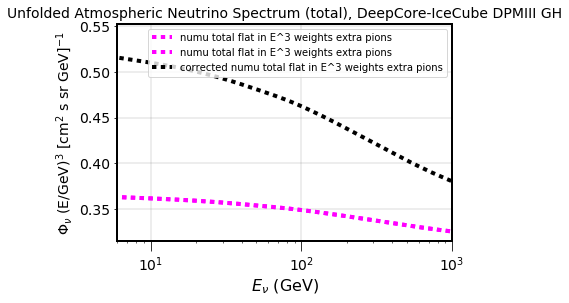

In [57]:
plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters), ls = ':', color = 'magenta', linewidth = 4.0, label = r'numu total flat in E^3 weights extra pions')

plt.plot(ecenters,0.150*(fmu(ecenters)+fmu_pUP50(ecenters))/fmu(ecenters) *flux_corr.correction_factor(ecenters, 1.50)* (ecenters**3), ls = ':', color = 'k', linewidth = 4.0, label = r'corrected numu total flat in E^3 weights extra pions')

#plt.plot(ecenters, 0.150*numu_tot_use_ySA/fmu(ecenters))

plt.xscale('log')
#plt.scale('loglog')
#plt.yscale('log')
plt.xlim([6, 1000])
#plt.ylim(0., 24.)

plt.title(r"Unfolded Atmospheric Neutrino Spectrum (total), DeepCore-IceCube DPMIII GH", fontsize=14)
plt.xlabel(r"$E_\nu$ (GeV)", fontsize=16)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=14)
plt.legend(loc=0)